# Multiple Linear Regression

<img src="img/mult_reg_dog.jpg" width="400">

## Objectives: 


- Create a multiple linear regression model using statsmodels
- Interpret the output for multiple linear regression
- Explain why multicollinearity is an issue in multiple linear regression
- Evaluate if our variables are showing multicollinearity

### Turn and Talk:

<img src="img/talking.jpeg" width="60" align='left'>

</br>

You are a data scientist for the WMATA. For your first project, they want you to predict the number of metro riders for each day. You decide to do a linear regression model predict the riders but need to gather data first. With a partner brainstorm a list of different variables you think would explain the number of daily riders.  


## Predicting MPG

You are working for a car company.  They know that their customers are interested in fuel efficient vehicles.  They have asked you to determine the characteristics of a car that lead to fuel efficiency so they can develop their next car model.  To do your analysis they have given you the MPG dataset which contains data about previous cars.  Use this data to help the car company understand what characteristics their new car model should have.

<img src="img/efficient.jpg" width="500">


In [6]:
# importing modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style="white")

In [7]:
#read in car data
df = sns.load_dataset('mpg')
#examine the head of the dataframe
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [8]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
# some descriptive analysis
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## Starting with a Simple Linear Regression Model

In [10]:
# building a simple linear regression model using statsmodels
from statsmodels.formula.api import ols

slr_model = ols(formula='mpg~weight', data=df).fit()
slr_model
slr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Wed, 01 Jul 2020   Prob (F-statistic):          2.97e-103
Time:                        13:00:42   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Turn and Talk:

<p><img src="img/talking.jpeg" width="60" align='left' ></p>
<br />
<br />
<br />


**1. Describe what you think the following things are doing:**

`ols()` 

`formula = 'mpg~weight` 

`data=df`

`fit()` 

**2.  Is weight a significant predictor of mpg?  How do you know?**

Answer:  

**3.  Describe the impact of weight on mpg using the weight coefficient.**

Answer: 

## Multiple Linear Regression
Multiple linear regression is simply a linear regression with more than one predictor, or independent variables. Let's recall the interpretation of $R^2$ in simple linear regression represents the proportion of variance explained by the model. What if we make the model more complex by including more predictors in it such that it account for even more variance in the outcome?


$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + + \beta_3 X_3\cdots + \beta_k X_k + \epsilon$

### Predicting income example

#### One predictor

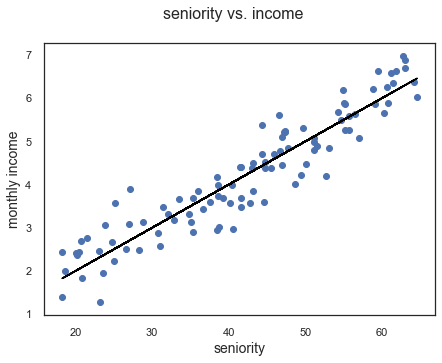

In [11]:
np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1,1)

fig = plt.figure(figsize=(7,5))
fig.suptitle('seniority vs. income', fontsize=16)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c = "black")
plt.xlabel("seniority", fontsize=14)
plt.ylabel("monthly income", fontsize=14)
plt.show()

#### Two Predictors

What if we include another factor, such as years of education? All that is doing is adding a higher dimensional object to the model, so our model will be three dimensional. 
<img src="./img/multi_reg_graph.png" style="withd:300px;">

### Multiple regression on our MPG data

In [12]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [13]:
mlr_model = ols(formula='mpg~weight+horsepower+displacement+cylinders+acceleration', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     186.9
Date:                Wed, 01 Jul 2020   Prob (F-statistic):          9.82e-101
Time:                        13:00:50   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2252.
Df Residuals:                     386   BIC:                             2276.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.2643      2.669     17.331      0.000      41.016      51.513
weight          -0.0052      0.001     -6.351      0.000      -0.007      -0.004
horsepower      -0.0453      0.017     -2.716      0.007      -0.078      -0.012
displacement -8.313e-05      0.009     -0.009      0.993      -0.018       0.018
cylinders       -0.3979      0.411     -0.969      0.333      -1.205       0.409
acceleration    -0.0291      0.126     -0.231      0.817      -0.276       0.218
==============================================================================
Omnibus:                       38.561   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.737
Skew:                           0.706   Prob(JB):                     3.53e-12
Kurtosis:                       4.111   Cond. No.                     3.87e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpretation of the Model Parameters
- Each β parameter represents the change in the mean target, E(y), per unit increase in the associated predictor variable **when all the other predictors are held constant**.
- For example, the β for weight indicates that with every one unit increase in weight the mpg will decrease by .0052 when horsepower, displacement, cylinders, and acceleration are constant.
- The intercept term, β0, represents the estimated mean response, E(y), when all the predictors x1, x2, ..., xp−1, are all zero (which may or may not have any practical meaning).


### Turn and Talk:

<p><img src="img/talking.jpeg" width="60" align='left' ></p>
<br />
<br />
<br />

With a classmate interpret the following:

**1. The coefficient and p-value associated with horsepower**

Answer:

**2. The coefficient and p-value associated with cylinders**

Answer: 

**3. The r-squared value**

Answer: 

___

## Inference vs Prediction

### Inference

- Goal: explain the association between outcome and predictors
- Focus on subset of features 
- Emphasis is on coefficients
- Simple models that are easily interpreted are preferred

Example question:  "How do years of education and IQ impact your adult salary level?"

### Prediction

- Goal: Develop a model that best predicts an outcome
- Use all available features
- Emphasis is on overall model accuracy
- More complex models that are less interpretable 

Example question:  "How can I use education and IQ to best predict adult salaries?"

## Multicollinearity 

**Multicollinearity** occurs when predictor variables in a regression model are very highly correlated with one another. This correlation is a problem because predictor variables should be independent of one another. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

### What Problems Do Multicollinearity Cause?

Multicollinearity causes the following two basic types of problems:

- The **coefficient estimates can swing wildly** based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
- Multicollinearity **reduces the precision of the estimated coefficients**, which weakens the statistical power of your regression model. You might not be able to trust the p-values to identify independent variables that are statistically significant.

#### Detecting Multicollinearity

**1.  Review scatterplot and correlation matrix**

A review of a scatterplot and correlation matrix to see which predictors are highly correlated to one another.  NOTE:  We want the predictors to be related to the target, not one another!

**2.  Review the variance inflation Factor (VIF)**

VIF measures how much the variance of the estimated regression coefficients are inflated as compared to when the predictor variables are not linearly related.

<img src="img/vif.png" width="400" align='left' >

In [ ]:
#scatterplot matrix
sns.pairplot(df)

In [ ]:
# Compute the correlation matrix
corr = df.corr()
corr

In [ ]:
#create a heatmap to visualize the correlations
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)

Even more examples to make your correlation heatmap look good
https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

In [ ]:
#examining VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

predictors= df.drop(columns=['mpg', "model_year", "origin", "name"])
convert_dict={'cylinders': float, 'weight':float}
predictors = predictors.astype(convert_dict)
predictors['Intercept']=1.0
predictors = predictors.dropna()
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]
vif["features"] = predictors.columns
vif

### Do I Have to Fix Multicollinearity?

The need to reduce multicollinearity depends on its severity and your primary goal for your regression model. Keep the following three points in mind:

- The severity of the problems increases with the **degree of the multicollinearity**. Therefore, if you have only moderate multicollinearity, you may not need to resolve it.
- Multicollinearity affects only the **specific predictor variables** that are correlated. Therefore, if multicollinearity is not present for the predictor variables that you are particularly interested in, you may not need to resolve it. 
- Multicollinearity **affects the coefficients and p-values, but it does not influence the predictions**, precision of the predictions, and the goodness-of-fit statistics. If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity.

***That being said, the easies way to deal with multicollinearity is just to remove one of the variables from your model***

### Rerun the model after removing the highly correlated variables

Let's take out displacement since it was highly correlated to other predictor variables and it had the highest VIF score of the predictor variables.

In [10]:
mlr_model = ols(formula='mpg~weight+horsepower+cylinders+acceleration', data=df).fit()
mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     234.2
Date:                Tue, 30 Jun 2020   Prob (F-statistic):          6.02e-102
Time:                        11:15:00   Log-Likelihood:                -1120.1
No. Observations:                 392   AIC:                             2250.
Df Residuals:                     387   BIC:                             2270.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       46.2740      2.448     18.902      0.000      41.461      51.087
weight          -0.0052      0.001     -7.070      0.000      -0.007      -0.004
horsepower      -0.0453      0.016     -2.820      0.005      -0.077      -0.014
cylinders       -0.4005      0.303     -1.321      0.187      -0.997       0.196
acceleration    -0.0290      0.125     -0.232      0.817      -0.275       0.217
==============================================================================
Omnibus:                       38.540   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.705
Skew:                           0.706   Prob(JB):                     3.59e-12
Kurtosis:                       4.111   Cond. No.                     3.55e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Turn and Talk:

<p><img src="img/talking.jpeg" width="60" align='left' ></p>
<br />
<br />
<br />


With a classmate, answer the following questions:

**1.  Did the r-squared values change from our previous model?**

**2.  Re-examine the coefficent and p-value for cylinders.  Are they different than our previous model?  How different?**

---

## Categorical Predictors

What if we were also interested in knowing if cars made in the USA were more fuel efficient than those made elsewhere???

Well we can **dummy code** that variable and use it as a predictor in addition to our continuous variables!!  Dummy coding is when we convert each category into a new column, and assign a 1 or 0 to the column.  

Since we only have two options for location the model is made we can just create a new column for USA containing values of 1 when the car was made in the USA and 0, when it was made elsewhere.

In [ ]:
df['USA'] = df['origin'].apply(lambda x:  1 if x == "usa"  else 0)
df.sample(5)

**Now that we have our dummy coding done let's use our USA variable in our model.**

In [ ]:
#model including USA
mlr_model = ols(formula='mpg~weight+horsepower+cylinders+acceleration+USA', data=df).fit()
mlr_model.summary()

#### Dummy variable coefficient interpretation

You see that we have coefficient and a p-value associated with USA just like our predictor variables. The coefficient for our dummy variable here tells is the average difference in the target between the variable and the **reference group**  The reference group is the categorical variable that is not represented explicitly by a dummy variable.  In this case our reference group is cars **not made in the USA**.

The coefficient of -2.0445 indicates that cars made in the USA have 2.0445 less mpg on average than those not made in the USA, **holding all other predictors constant**.  The p-value of .001 indicates that this is a statistically significant difference.

---

## Back to the business problem

Remember, you were hired by the car company to determine the characteristics of a car that lead to fuel efficiency so they can develop their next car model.  According to our modeling what might you recommend to the company?

---

## Practice time!

Using the `cleaned_movie_data.csv` run a multiple linear regression model to predict gross revenue.  Start with 3 continuous variables and then add on a categorical predictor to LEVEL UP.

## Resources

Everything about regression:  https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-tutorial-and-examples

Statsmodels example: https://datatofish.com/statsmodels-linear-regression/